# Model free evaluation
we do not assume complete knowledge of the environment.

***Monte Carlo methods*** require only experience;


*   sample sequences of states, actions, and rewards from on-line or simulated interaction with an environment.

Monte Carlo methods can be used in two ways:
*   **On-line**: No model necessary and still attains optimality
*   **Simulated**: Planning without a full probability model

Monte Carlo methods learn from complete sample return. (**Only defined for episodic tasks.**)



# Monte Carlo Policy Evaluation
Each occurrence of state s in an episode is called a visit to s.

* **Every-Visit MC**: average returns for every time s is visited in an
episode.

* **First-visit MC**: average returns only for first time s is visited in an episode

example:


$$ A + 3⇒A + 2⇒B -4 ⇒A+4⇒B-3⇒Ternimal \\
B-2 ⇒A+3⇒B-3⇒Ternimal $$

First visit values:
$$V(A)= \frac{1}{2}(2+0)=1\\ V(B)=\frac{1}{2}(-3-2)=-\frac{5}{2} $$

Every Visit values:
$$V(A) = \frac{1}{4}(2 + -1 + 1 + 0) = \frac{1}{2}\\V(B) = \frac{1}{4}(-3 + -3 + -2 + -3) = \frac{-11}{4}$$


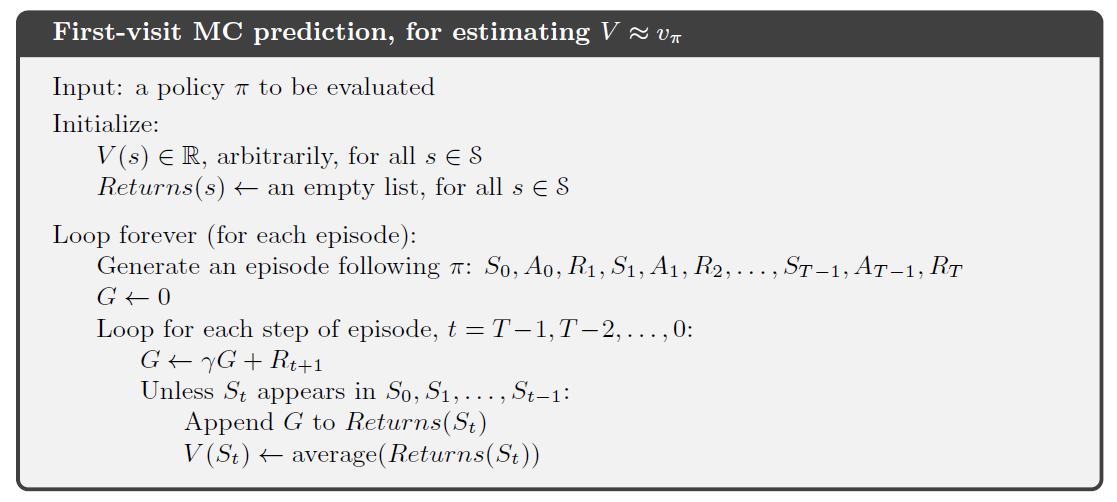

**Monte Carlo Evaluation**

Approximate value function:
$$ V^{\pi}_n(s) \approx \frac{1}{n(s)} \sum_{k=1}^{n(s)} G_k
\\= \frac{1}{n(s)}( G_{n(s)} + \sum_{k=1}^{n(s)-1} G_k)\\
= \frac{1}{n(s)}( G_{n(s)} + (n(s)-1)V^{\pi}_{n-1}(s))\\= V^{\pi}_{n-1}(s) + \frac{1}{n(s)}( G_{n(s)} - V^{\pi}_{n-1}(s) )  $$
Incremental update:
$$V^{\pi}_n(s) \leftarrow V^{\pi}_{n-1}(s) + \alpha_n (G_n - V^{\pi}_{n-1}(s))\\ \alpha = Learning Rate $$




# **Temporal Difference Evaluation**

Approximate value function:
$$V^{\pi}(s) \approx r + \gamma V^{\pi}(s')$$

Incremental update:
$$V^{\pi}_n(s) \leftarrow V^{\pi}_{n-1}(s) + \alpha_n ( r + \gamma V^{\pi}_{n-1}(s') - V^{\pi}_{n-1}(s))$$
$\textbf{Theorem:}$ If $\alpha_n$ is appropriately decreased with the number of times a state is visited then $V^{\pi}_n(s)$ converges to the correct value.

* $\sum_n \alpha_n \to ∞ $
* $\sum_n (\alpha_n)^2 < \infty$

often $\alpha_n=\frac{1}{n(s)}$ where $n(s)$ #of times s is visited.


images from RL course,Mohammad Hossein Rohban, Ph.D. Spring 2024
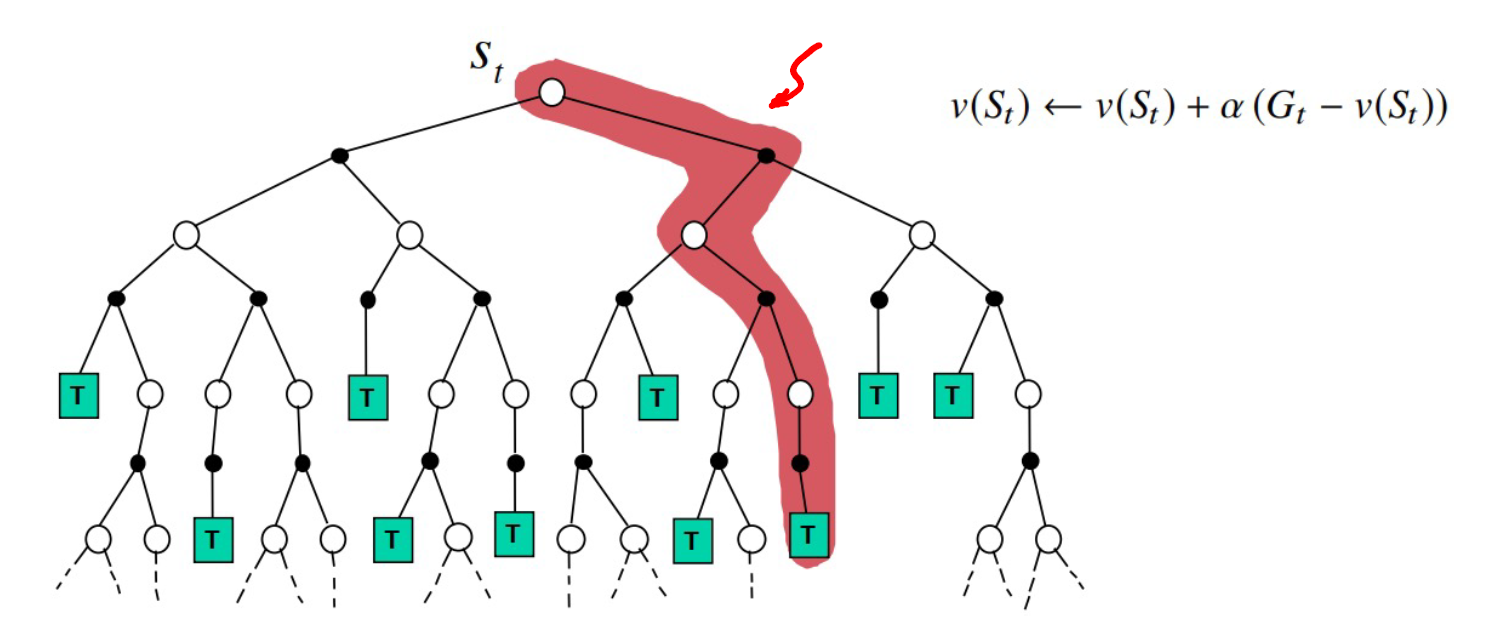

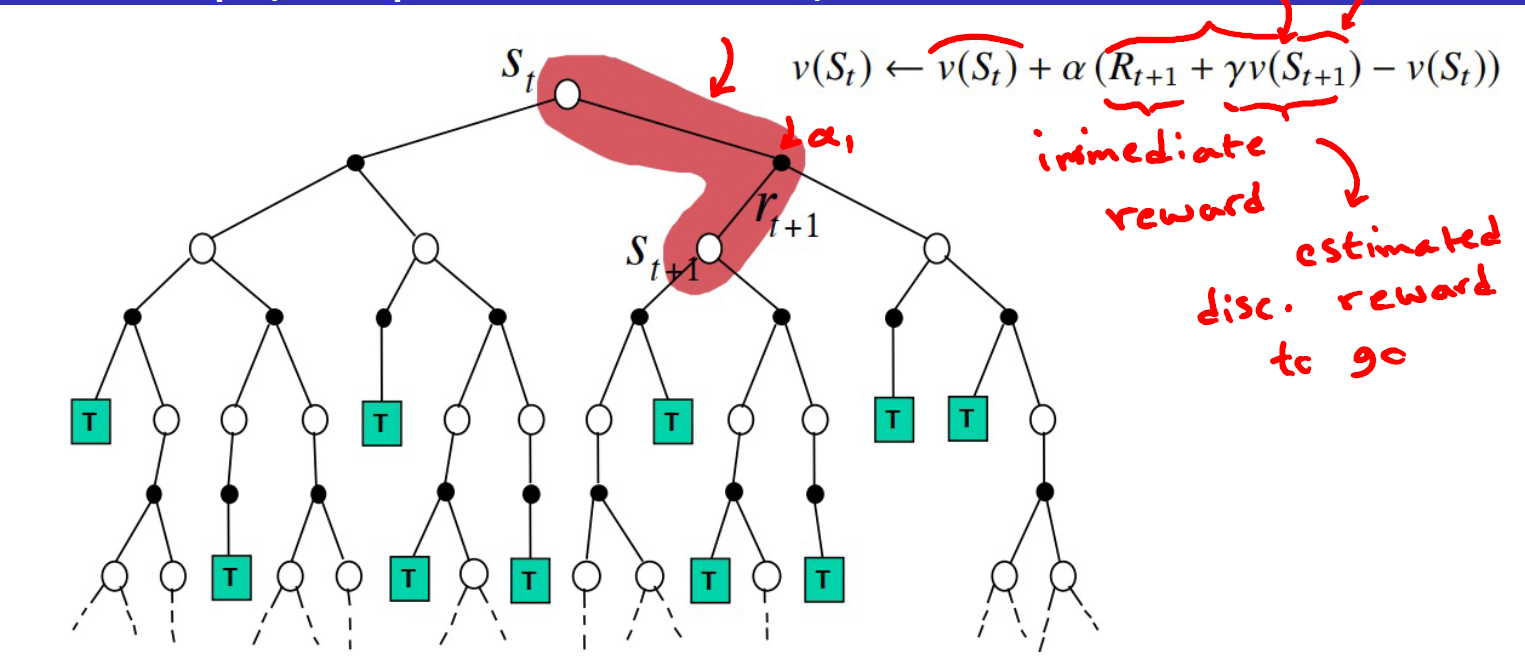

**Bachward view**


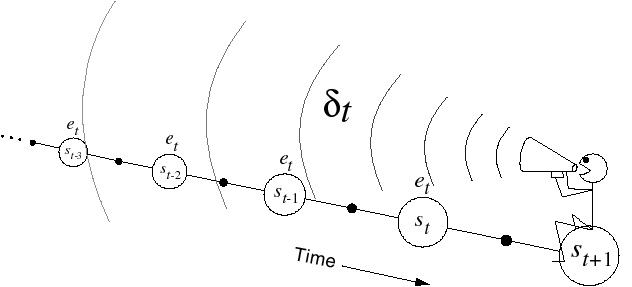

**Eligibility Traces**

$$\delta_t = r_{t+1} + \gamma V_t(s_{t+1}) - V_t(s_t)\\V(s) \leftarrow V(s) + \alpha \delta_t E_t(s)$$


**SARSA**
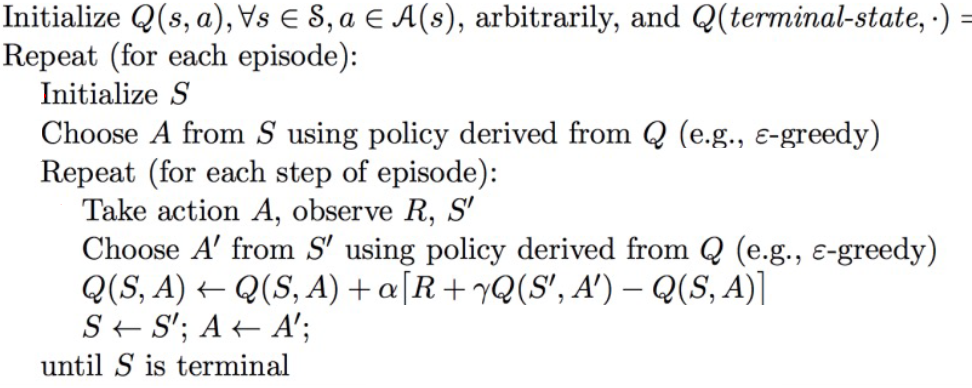

**Q-Learning**
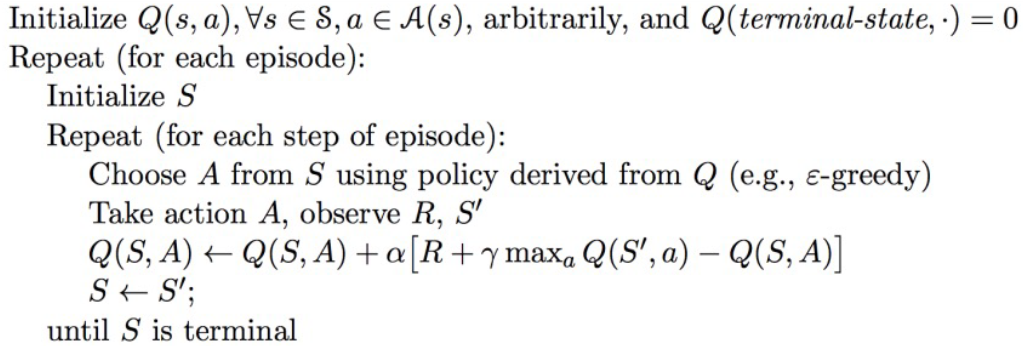

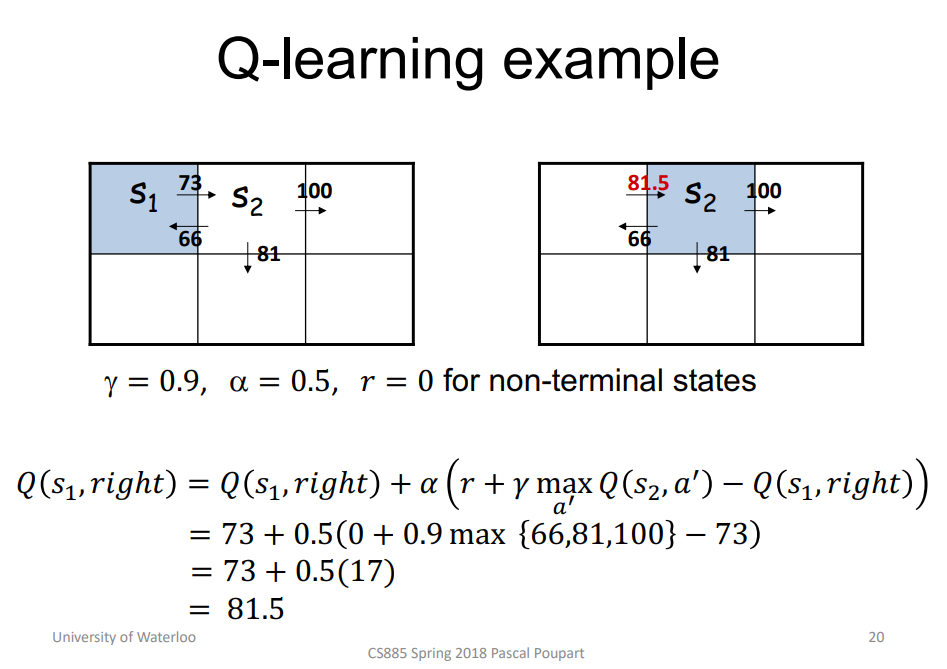

#Q_Learning_code_example

Final Policy Learned:
[['D' 'D' 'D' 'D' 'D']
 ['R' 'R' 'D' 'D' 'D']
 ['R' 'R' 'D' 'R' 'D']
 ['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'G']]


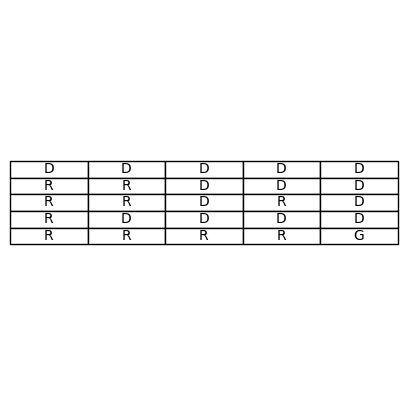

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the environment
class GridWorld:
    def __init__(self, size, start, goal):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)
        self.state = (x, y)

        reward = 100 if self.state == self.goal else -5
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment
env = GridWorld(size=5, start=(0, 0), goal=(4, 4))

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500

# Initialize Q-table
Q = np.zeros((env.size, env.size, len(env.actions)))

# Q-learning algorithm
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        x, y = state

        # Choose action
        if random.uniform(0, 1) < epsilon:
            action_index = random.randint(0, len(env.actions) - 1)
        else:
            action_index = np.argmax(Q[x, y])

        action = env.actions[action_index]

        # Take action
        next_state, reward, done = env.step(action)
        next_x, next_y = next_state

        # Update Q-value
        Q[x, y, action_index] = Q[x, y, action_index] + alpha * (reward + gamma * np.max(Q[next_x, next_y]) - Q[x, y, action_index])

        state = next_state

# Print the final policy
policy = np.full((env.size, env.size), ' ')
for i in range(env.size):
    for j in range(env.size):
        best_action = np.argmax(Q[i, j])
        policy[i, j] = env.actions[best_action][0].upper()  # First letter of the action

policy[env.goal] = 'G'  # Goal state
print("Final Policy Learned:")
print(policy)

# Display the policy
plt.figure(figsize=(5, 5))
plt.table(cellText=policy, loc='center', cellLoc='center')
plt.axis('off')
plt.show()


# SARAS_code_example

Final Policy Learned:
[['R' 'R' 'D' 'L' 'L']
 ['R' 'R' 'D' 'U' 'L']
 ['R' 'R' 'R' 'U' 'L']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'G']]


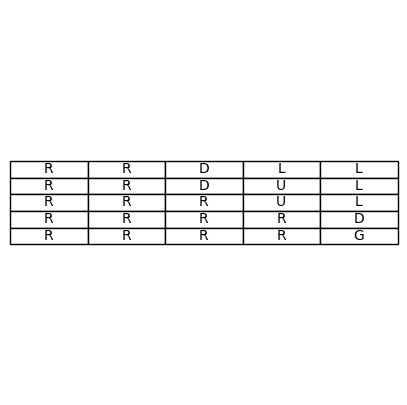

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the environment
class GridWorld:
    def __init__(self, size, start, goal):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)
        self.state = (x, y)

        reward = 100 if self.state == self.goal else -1
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment
env = GridWorld(size=5, start=(0, 0), goal=(4, 4))

# SARSA parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500

# Initialize Q-table
Q = np.zeros((env.size, env.size, len(env.actions)))

# SARSA algorithm
for episode in range(episodes):
    state = env.reset()
    x, y = state

    # Choose action
    if random.uniform(0, 1) < epsilon:
        action_index = random.randint(0, len(env.actions) - 1)
    else:
        action_index = np.argmax(Q[x, y])

    action = env.actions[action_index]

    done = False
    while not done:
        next_state, reward, done = env.step(action)
        next_x, next_y = next_state

        # Choose next action
        if random.uniform(0, 1) < epsilon:
            next_action_index = random.randint(0, len(env.actions) - 1)
        else:
            next_action_index = np.argmax(Q[next_x, next_y])

        next_action = env.actions[next_action_index]

        # Update Q-value
        Q[x, y, action_index] = Q[x, y, action_index] + alpha * (reward + gamma * Q[next_x, next_y, next_action_index] - Q[x, y, action_index])

        state = next_state
        action = next_action
        x, y = state

# Print the final policy
policy = np.full((env.size, env.size), ' ')
for i in range(env.size):
    for j in range(env.size):
        best_action = np.argmax(Q[i, j])
        policy[i, j] = env.actions[best_action][0].upper()  # First letter of the action

policy[env.goal] = 'G'  # Goal state
print("Final Policy Learned:")
print(policy)

# Display the policy
plt.figure(figsize=(5, 5))
plt.table(cellText=policy, loc='center', cellLoc='center')
plt.axis('off')
plt.show()
